# Neural Network Theory

This is a neural network theory review, so this way, I can expand my memory and reasoning, and at the same time be with a memory book on my back, so lets start this.

The Series of video I've searched o learn about this is this one: [Neural Networks from Scratch](https://www.youtube.com/watch?v=Wo5dMEP_BbI), where he tries to teach in full basic python and then uses only numpy (witch is self explicatory).


---

## Cap. 1 - Introduction to Neural Networks

Let's start with what is neural networks, 

Neural networks are a class of machine learning models inspired by the structure and functioning of the human brain. They are composed of interconnected nodes, or artificial neurons, organized in layers.

Each neuron takes multiple input values, performs a weighted sum of these inputs, applies an activation function to the result, and produces an output. The weights associated with each input are adjusted during training to enable the network to learn from data.

[Example of a neural Network](https://www.youtube.com/watch?v=-6mZWjIEkDc&t=1s)

Data is going to get passed forward until we have an oputput layer with will output a probbility of with one would be. On the example, it is the probability of being a dog or a cat.

So let's do an example code

In [39]:
#Here we are representing one neuron. It is receiving imputs from the last layer and have weight to each one of them
#after we are going to sum a bias (explained after)
inputs = [1.2, 5.3, 4.1]
weights = [3.1, 2.2, 9.0]
bias = [0.8]

output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias[0]
print(output)



53.08


[This](https://www.youtube.com/watch?v=vbeanwfm0Q4) is visualy what the neuron is actually doing.

This is calculation of what a neuron should output, next we are going to se how to see it in linear algebra...

---

## Cap. 2 - Coding a layer

for us to see the layer, let's think of it being a conjunction of neurons. Each neuron have a series of weights that will multiply the input, for this what we can do is to represent the layer with a list of lists, each one of them being the set o weights of one neuron, and doing the same thing with the bias.

[Example of a layer](https://www.youtube.com/watch?v=Uvngs6sWyBg&t=2s)

We can see now that the output will be a series of answers of each neuron, so we will have a list of answers.

In [12]:
#Here we are representing one layer with multiple neurons.
inputs = [1.2, 5.3, 4.5]

weights1 = [3.1, 2.2, 9.23]
weights2 = [2.5, 5.4, 1.7]
weights3 = [4.2, 10.2, 8.4]

layerweight = [weights1, weights2, weights3]

bias = [0.8, 2, 1.6]

output = [inputs[0] * layerweight[0][0] + inputs[1] * layerweight[0][1] + inputs[2] * layerweight[0][2] + bias[0],
          inputs[0] * layerweight[1][0] + inputs[1] * layerweight[1][1] + inputs[2] * layerweight[1][2] + bias[1],
          inputs[0] * layerweight[2][0] + inputs[1] * layerweight[2][1] + inputs[2] * layerweight[2][2] + bias[2]]

print(output)

[57.715, 41.27, 98.5]

We can simplify things doing linear algebra, as we can see, que can do the dot product into the vectors inputs and weights to het the same exact answer.

For this, we are going to use numpy and transform all the vector into numpy arrays and do the dot product:

In [38]:
import numpy as np 

inputs = np.array([1.2, 5.3, 4.5])

weights1 = [3.1, 2.2, 9.23]
weights2 = [2.5, 5.4, 1.7]
weights3 = [4.2, 10.2, 8.4]

layerweight = np.array([weights1, weights2, weights3])

biases = np.array([0.8, 2, 1.6])

layer_output = np.zeros((len(layerweight)))

for i in range(len(inputs)):
    output = 0
    for j in range(len(layerweight)):
        output += inputs[j] * layerweight[i][j]
        #print(i,j,output)
    output += biases[i]
    #print(output)
    layer_output[i] = output

print(layer_output)

[57.715 41.27  98.5  ]


As you can see we iterate through each one of the elements on the numpy array and did the operations and then appended the result to the layer output.

We can have in another way, did in the series of videos in witch I'll write down for you to see:

In [1]:
#The same thing but doing a diferent way of solving it (or explaning)
import numpy as np 

inputs = np.array([1.2, 5.3, 4.5])

weights1 = [3.1, 2.2, 9.23]
weights2 = [2.5, 5.4, 1.7]
weights3 = [4.2, 10.2, 8.4]

layerweight = np.array([weights1, weights2, weights3])

biases = np.array([0.8, 2, 1.6])

layer_output = []
for neuron_weights, neuron_bias in zip(layerweight, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_output.append(neuron_output)

print(layer_output)

[57.715, 41.27, 98.5]


As you can already verify or understand because of linear algebra, what we did is the dot product, wicth we can put it on the code to really simplify our understanding:


In [2]:
#The same thing but doing a diferent way of solving it (or explaning)
import numpy as np 

inputs = np.array([1.2, 5.3, 4.5])

weights1 = [3.1, 2.2, 9.23]
weights2 = [2.5, 5.4, 1.7]
weights3 = [4.2, 10.2, 8.4]

layerweight = np.array([weights1, weights2, weights3])

biases = np.array([0.8, 2, 1.6])

layer_output = np.dot(layerweight, inputs) + biases

print(layer_output)

[57.715 41.27  98.5  ]


---

## Cap.3 - batches, layers and objects

we already dealt with one neuron and one input and one layer and one input, but now we want to extrapolate, image two layers, five, ten, imagine each layer with 50 neuron, 100, 1000.

for this we need to imaginate all the things into objects, for simplification.

But why we should need to send more than one input at a time, and this is simple, we can do calculations in paralel, witch can have a huge effect when we think about time spent training models. The second reason is what you can see in this [video](https://nnfs.io/vyu/), as we give more batch sizes, the less wooble the curve has and the better it can recognize the pattern.

Being carefull to not do overfitting, that is, where a model learns the training data too well, including its noise and specific patterns that may not generalize well to new, unseen data. In other words, an overfit model fits the training data too closely, capturing the noise or random fluctuations in the data rather than the underlying patterns.

For this, let's upgrade the last code giving more input data, for this, we need to change only one thing, being the dot product. As we saw on the last class the dot product helps immensily on seing what is happening behind the curtains, but now with an input array with more than 1 dimentions we have a problem, witch is simply solved by transposing the second array, being the weights. this because [how the matrix multiplication works](https://www.youtube.com/watch?v=KBPvlUp-m5Y). 

Let's see the code

In [9]:
import numpy as np 

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

layerweight = [[0.2, 0.8, -0.5, 1.0],
               [0.5, -0.91, 0.26, -0.5],
               [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_output = np.dot(inputs, np.array(layerweight).T) + biases

print(layer_output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


[This](https://www.youtube.com/watch?v=ocrXqFCW3WE&t=31s) is excatly what we did

Now for us to have another layer, we need to have another set of neuron, with another set of weight and biases sinc with it, for this, see the code below

Note that the input of the layer2 is the layer_output of the layer1 giving the network it's connection.

In [10]:
#The same thing but doing a diferent way of solving it (or explaning)
import numpy as np 

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

layerweight1 = [[0.2, 0.8, -0.5, 1.0],
               [0.5, -0.91, 0.26, -0.5],
               [-0.26, -0.27, 0.17, 0.87]]

layerweight2 = [[0.1, -0.14, 0.5],
                [-0.5, 0.12, -0.33],
                [-0.44, 0.73, -0.13]]

biases1 = [2, 3, 0.5]

biases2 = [-1, 2, -0.5]

layer_output1 = np.dot(inputs, np.array(layerweight1).T) + biases1

layer_output2 = np.dot(layer_output1, np.array(layerweight2).T) + biases2

print(layer_output2)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


Now we can think of the layer as a object itself, because, we saw that we need to have 2 things to create a layer: it's shape and it's number of inputs, because with this, we can create a new array with biases and weights and we can create function tha gives the output given their inputs, so we can create a class like this:


In [48]:
import numpy as np

class NetworkLayer():
    '''
    In the init function we need to create a set o weights and a set of biases, for the weights we know 
    (because of the dot product) that it need to be number imput (or else it doesn't match) by the number 
    of neurons in the layer, and for the biases it need to be 1 by the number of imputs (each imput with
    one bias).
    '''
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    '''
    for the forward method we need simply to do the calculations and give the result in a way that can be 
    used somewhere else in the code for new layers to use, so we simple give a variable name or we return
    it.
    '''
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

    

Now we can identify and create layers of neurons in our network and cascate it for more layers in our deep lerning network

In [24]:
#example with one layer
import numpy as np 

X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

layer = NetworkLayer(4,5)

layer.forward(X)
print(layer.output)

[[ 0.09641592 -0.45234704  0.56572563 -0.11232398 -0.1293504 ]
 [-0.43472621 -0.9388246   0.36680802 -0.30675596 -0.8060944 ]
 [ 0.63989101 -0.07786409  0.55203872 -0.39003505 -0.22158323]]


In [27]:
#example with two layers
import numpy as np 

X = [[1, 2],
     [2.0, 5.0],
     [-1.5, 2.7]]

first_layer = NetworkLayer(2,5)
second_layer = NetworkLayer(5,1)

first_layer.forward(X)
print('weights',first_layer.weights)
print()
print('biases', first_layer.biases)
print()
print('output', first_layer.output)

print()

second_layer.forward(first_layer.output)
print('weights',second_layer.weights)
print()
print('biases', second_layer.biases)
print()
print('output', second_layer.output)

weights [[-0.12928569  0.02670509 -0.00392828 -0.11680935  0.05232767]
 [-0.01715463  0.07717906  0.08235042  0.21632359  0.13365279]]

biases [[0. 0. 0. 0. 0.]]

output [[-0.16359496  0.1810632   0.16077255  0.31583784  0.31963326]
 [-0.34434455  0.43930545  0.40389551  0.84799928  0.77291931]
 [ 0.14761103  0.16832582  0.22823854  0.75928773  0.28237105]]

weights [[-0.03691818]
 [-0.02393792]
 [ 0.10996596]
 [ 0.06552637]
 [ 0.06401315]]

biases [[0.]]

output [[0.0605413 ]
 [0.15165459]
 [0.0834484 ]]


This is the neural network we are representing right now:

![Example of the Neural Network](Neural_Network_example.png)

---

## Cap.4 -  Hidden Layer Activation Functions

### *These are some of the activation functions we use on neural networks*

 - Sigmoid Activation Function:

 $$σ(x)= \frac{1}{1+e^{-x}}$$

 where x is the input to the neuron (after the weights an biases).

 - Hyperbolic Tangent (tanh) Activation Function:

 $$\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$$

 This function squashes the input values to the range [−1,1].

 - Rectified Linear Unit (ReLU) Activation Function:

 $$ReLU(x)=max(0,x)$$

 ReLU replaces all negative values with zero, leaving positive values unchanged.

 - Leaky ReLU Activation Function:

 $$\text{Leaky ReLU(x)}= \begin{cases} x, & \text{if } x > 0, \\ αx, & \text{otherwise.} \end{cases}$$
​         
 ​where α is a small positive constant.

 - Exponential Linear Unit (ELU) Activation Function:
 
 $$\text{ELU(X)} = \begin{cases} x, & \text{if} x > 0, \\ α {(e^x - 1)}, & \text{otherwise.} \end{cases}$$

 if x>0 otherwise where α is a parameter that controls the function's behavior for negative inputs.


But why we use them?

[Simple Activation functions introduce non-linearity to the network](https://www.youtube.com/watch?v=joA6fEAbAQc). Without non-linear activation functions, a neural network, no matter how deep, would behave like a linear model. The ability to model and learn complex, non-linear relationships in the data is essential for the success of neural networks in solving a wide range of tasks.

The non-linear properties of activation functions enable neural networks to learn and represent complex functions. Multiple layers of non-linear activation functions allow the network to approximate and represent highly intricate mappings between inputs and outputs. 

Activation functions stabilize learning by normalizing the output of neurons, preventing issues like vanishing or exploding gradients.

Activation functions mimic the behavior of neurons in the human brain, making neural networks more biologically plausible.

Let's implement it in code:

In [3]:
class ActivationFunctions():
    def ReLU(self, inputs):
        self.output = np.maximum(0, inputs)

Just for showdown, we are going to have a function that creates values and gives them to us for simplicity, for our initial imputs, and this is the function

In [5]:
import numpy as np

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

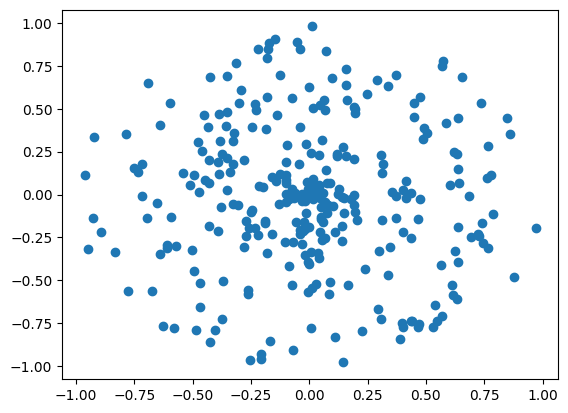

In [20]:
coord,t = spiral_data(100,3)

import matplotlib.pyplot as plt

plt.scatter(coord[:,0],coord[:,1])
plt.show()


As you can see with this, it's a mess, but we can see our data is spiraling in control, but, if we color it:

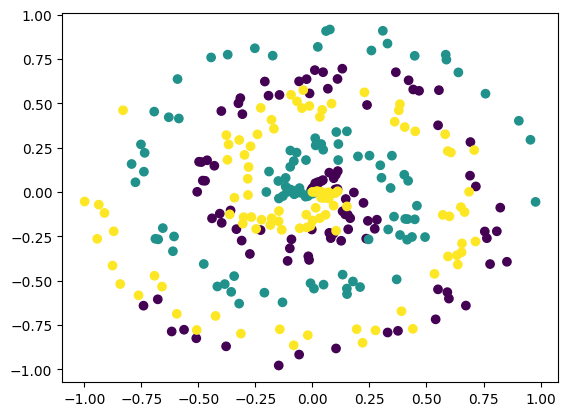

In [21]:
coord,t = spiral_data(100,3)

import matplotlib.pyplot as plt

plt.scatter(coord[:,0],coord[:,1], c=t)
plt.show()


We can see that the data has 2 outputs, one is it's type, and the other are it's coordinates. If we feed the data to our neural network, we first have to send out the coordinates, that will have some effect on the probability of it being one of the 3 types (on the next class we'll see what we are going to do with the classes). For now, we hava a lot of data in a batch of 100*3 created by the function, this will be feed by our neural network and be processed. Let's do only one layer for simplicity and let's run the X (coordinates of each point) through the network. What we are doing it's almost the same thing we did the last time, only this time we are feeding a lot more data (and gave a reason for it, divide the space in a way that we can separate what is of each type, blue, yellow and purple)

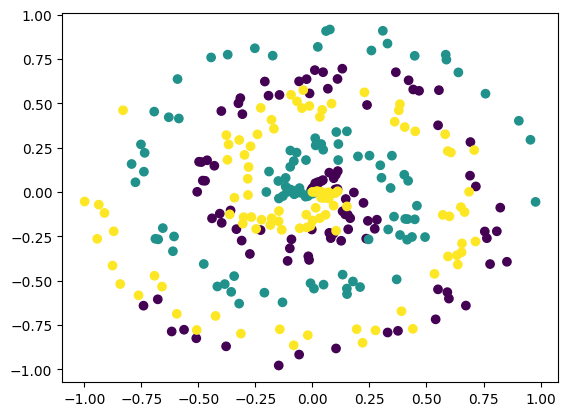

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.00032035 0.         0.00149577]
 [0.         0.         0.00046291 0.         0.00275999]
 ...
 [0.09932798 0.03718832 0.         0.02994671 0.        ]
 [0.10056436 0.03907992 0.         0.0308003  0.        ]
 [0.10335267 0.10869268 0.         0.054718   0.        ]]


In [24]:
#example with two layers
import numpy as np 

X,t = spiral_data(100,3)

import matplotlib.pyplot as plt

plt.scatter(coord[:,0],coord[:,1], c=t)
plt.show()

first_layer = NetworkLayer(2,5)
activation = ActivationFunctions()

first_layer.forward(X)
activation.ReLU(first_layer.output)

print(activation.output)




Isn't it beautifull????? Note that the output has a lot of 0, showing that our activation function worked, but for now the data doen't make sense, because we need some kind of form to see if the ouput is reasonable and send a signal to the network to "remake" itself in a way that the predictions get better over time, but let's see it in another class


---

## Cap. 5 - softmax activation function

for this time lets imagine the output layer only. What should the output be? a number? an integer? a float point? We all can think of it being a probability, of course, we are trying to think of it being a "prediction" not a number calculation or something like that, we are trying to describe for example, having a set of points, what is the probability of it being blue, yellow or purple? But the way we did it, we don't actually have an probability, we only have numbers. 

In neural Networks we also have a problem, for example, if the numbers are negative? what is it predicting? for example is there a negative probability? no, so for sure we need to have it always being more than 0.

Another problem we have is the number spyraling out of control, getting bigger and bigger, so we need to have some kind of maximum or some type of transformation to get the number always positivem and not only truncating it but actually transforming it into a reasonable number, we could for example have a log to transform bigger numbers into smaller ones, for example, but one solution we as programmers found is the softmax activation function.

At first the softmax activation function uses $e^x$ function to transform negatives numbers into positive. But me merge into a problem, if the number is large, the exponentiation makes it a larger and larger until it overflows. so we can for example subtract from every number in the input array the maximum value of the array, for example if we have 

$$
\left(\begin{array}{cc} 
1\\2\\3
\end{array}\right)
$$

we can use the maximum function to find the greatest value and subtract

$$
\left(\begin{array}{cc} 1\\2\\3\end{array}\right) - 
\max{\left(\begin{array}{cc} 1\\2\\3\end{array}\right)} =
 \left(\begin{array}{cc} 1\\2\\3\end{array}\right) - 3 = 
 \left(\begin{array}{cc} -2\\-1\\0\end{array}\right)
$$

by doing this, when we use the $e^x$ function, we are bound to y = [0,1], not only we protected ourselves from the negative and the exploding problems, but we also have no problem doing the probability because none of this functions changes the final probability, and if we normalize the array, we can have all the probabilitis.

Just for the sake of the argument, let's do the calculations.

Remember that this is how we normalize a vector:
$$
 \text{y} = \frac{u}{\sum_{i=1}^{n} u_i}, \text{and with u} = 
\left(\begin{array}{cc} 1\\2\\3\end{array}\right)
$$

So with this in mind, we have:

$$
\left(\begin{array}{cc} 1\\2\\3\end{array}\right) - \max{\left(\begin{array}{cc} 1\\2\\3\end{array}\right)} = 
\left(\begin{array}{cc} -2\\-1\\0\end{array}\right) \rightarrow
\left(\begin{array}{cc} e^{-2}\\e^{-1}\\e^{0}\end{array}\right) \approx
\left(\begin{array}{cc} 0,1353\\0,3678\\1\end{array}\right) \rightarrow
\left(\begin{array}{cc} {\frac{e^{-2}}{e^{-2}+e^{-1}+e^{0}}}\\{\frac{e^{-1}}{e^{-2}+e^{-1}+e^{0}}}\\
{\frac{e^{0}}{e^{-2}+e^{-1}+e^{0}}}\end{array}\right) \rightarrow

\left(\begin{array}{cc} {\frac{0,1353}{1,5032}}
\\{\frac{0,3678}{1,5032}}\\
{\frac{1}{1,5032}}\end{array}\right) \rightarrow

\left(\begin{array}{cc} 0,090\\0,244\\0,665\end{array}\right) 
$$

And now let's implement it in code

In [57]:
class ActivationFunctions():
    def ReLU(self, inputs):
        self.output = np.maximum(0, inputs)

    def Softmax(self, inputs):
        intermediate_value = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = intermediate_value/np.sum(intermediate_value, axis=1, keepdims=True)
    

Now we are going to try it out on the code

In [90]:
#example with two layers
import numpy as np 

X,t = spiral_data(100,3)

first_layer = NetworkLayer(2,3)
second_layer = NetworkLayer(3,3)

activation1 = ActivationFunctions()

first_layer.forward(X)
activation.ReLU(first_layer.output)

second_layer.forward(activation.output)
activation.Softmax(second_layer.output)

print(activation.output)




[[0.33333333 0.33333333 0.33333333]
 [0.33332688 0.33336473 0.33330839]
 [0.33335179 0.33334327 0.33330494]
 [0.33336123 0.33334834 0.33329043]
 [0.33336668 0.33335891 0.33327442]
 [0.33335674 0.33340402 0.33323924]
 [0.33338831 0.33336291 0.33324878]
 [0.33340026 0.33336934 0.3332304 ]
 [0.33321743 0.33365215 0.33313043]
 [0.33318188 0.33372306 0.33309506]
 [0.33330176 0.33360199 0.33309625]
 [0.33316076 0.33378158 0.33305766]
 [0.33318202 0.33379268 0.3330253 ]
 [0.33324929 0.33374157 0.33300914]
 [0.33320651 0.33381745 0.33297604]
 [0.33309699 0.33394692 0.33295609]
 [0.33313749 0.3339403  0.33292221]
 [0.33305052 0.33405477 0.33289471]
 [0.33304222 0.33408711 0.33287066]
 [0.33303299 0.33411277 0.33285423]
 [0.33318683 0.33368516 0.33312801]
 [0.33303468 0.33416606 0.33279927]
 [0.33297952 0.33424994 0.33277054]
 [0.33295031 0.33431035 0.33273934]
 [0.3329279  0.33437486 0.33269724]
 [0.33292551 0.33437046 0.33270402]
 [0.33324594 0.33352355 0.33323051]
 [0.33328574 0.33341958 0.33

- First: This is incredable
- Second: Note that all the probabilitis lies in the 1/3, that's because imagine it being a random mess of weights, it should really give an actual uniforms probability throughout!!! that's amazing it's working as it should!!!!